In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.decomposition import PCA
%matplotlib inline



In [4]:
#Load all Models
!ls model



data_100_100_norm.npz               mean_preprocess.pickle
data_pca_50_y_mean_.pickle.npz      model_svm.pickle
dataframe_images_100_100.pickle     pca_50.pickle
haarcascade_frontalface_default.xml


In [5]:
import pickle
haar = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
#pickle files
mean = pickle.load(open('model/mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('model/model_svm.pickle','rb'))
model_pca = pickle.load(open('model/pca_50.pickle','rb'))

print ('Model Loaded Successfully')

Model Loaded Successfully


In [6]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [29]:
# step-1: read image
img = cv2.imread(test_data_path)
def pipeline_model(img,color='rgb'):
    # step-2: convert into gray scale
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # step-3: crop the face (using haar cascase classifier)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) # drawing rectangle
        roi = gray[y:y+h,x:x+w] # crop image
        # step - 4: normalization (0-1)
        roi = roi / 255.0
#         print(roi.shape)
        # step-5: resize images (100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        # step-6: Flattening (1x10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1 can also be used
        # step-7: subtract with mean
        roi_mean = roi_reshape - mean
        # step -8: get eigen image
        eigen_image = model_pca.transform(roi_mean)
#         print(eigen_image)
        # step -9: pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]
        print (results)
        # step -10:
        predict = results.argmax() # 0 or 1 
        score = results[predict]
#         print(predict,score)
        # step -11:
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img

# cv2.imshow("gender prediction",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [30]:
# eig_img = model_pca.inverse_transform(eigen_image)

In [31]:
# plt.imshow(eig_img.reshape((100,100)),cmap='gray')

In [32]:
from PIL import Image
import matplotlib.image as mat_image

(273, 273)
[[ 0.09541667  0.15884676 -1.48479425 -0.62267702  0.03228051 -0.31331413
  -1.19985021 -1.0788146  -0.05231677  0.5369508  -0.59925341 -2.04019024
   0.80793099 -0.24519024  0.18234782  1.25683426  2.53915142 -0.78824765
  -0.70712631  1.81276099 -0.40191643  0.44407031 -0.17372528  0.59779795
   1.88772026  1.92926116 -0.47959834  0.37966816  0.10702345  0.79901074
  -0.41801488  0.85682812 -2.61194094  0.11934115 -0.53214632 -1.4620172
   0.24867783 -1.67167166 -1.25191501  0.39487003  1.65461506 -0.12810996
   0.8452256   1.02645167  0.44979799  1.62086198 -1.35276772 -0.13399812
  -0.36692534 -0.99745649]]
[0.83173716 0.16826284]
AxesImage(54,36;334.8x217.44)


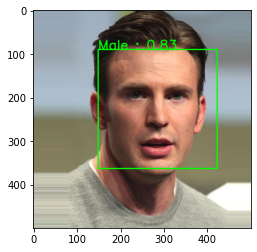

In [33]:
test_data_path = 'chris.jpg'
color = 'bgr'
# step-1: read image
img = Image.open(test_data_path) # rgb
# step2: convert into array
img = np.array(img)
# step3: pass to pipeline model
image = pipeline_model(img)
print(plt.imshow(image))

# Apply pipepline to Video

In [15]:
cap = cv2.VideoCapture('video.mp4')

while True:
    ret, frame = cap.read() # bgr
    
    if ret == False:
        break
    
    frm = pipeline_model(frame,color='rgb')
    
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10) == ord('s'): # press s to exit  --#esc key (27), 
        break
        
cv2.destroyAllWindows()
cap.release()

[[-2.27987953  1.0851567   0.74522298 -0.37641145  0.11897695 -0.11896944
   0.89585456  0.68867164  0.2226527  -0.5706413   0.24374625 -0.03678787
  -0.83760949 -0.71800799 -0.94307669 -1.18546561  0.16735463 -0.27274247
  -0.17773864  0.06921255 -0.48461373 -0.28049806  0.40212188 -0.02169415
   0.3775631   0.40657862 -0.71387904 -0.32635405 -0.11330336  0.25050857
   0.06149169  0.4996001  -0.24816069 -0.04731984 -0.08882142  0.03827347
  -0.29502147  0.18341757  0.00437114  0.10202284 -0.18458328  0.40266174
  -0.07512379 -0.01583518  0.09894422  0.0713807  -0.02003443 -0.01702341
  -0.01045062 -0.40749627]]
[0.69020118 0.30979882]
